# 1D superconductor without spin-orbit coupling

## Hamiltonian
$$H^{BdG}_{\textbf{k}}(t) = \left[w_0 \left(e^{i ( \tau^z {\textbf k} +\vec{\phi} t) \cdot {\textbf a}}
+e^{-i ( \tau^z {\textbf k} +\vec{\phi} t) \cdot {\textbf a}} \right)-\mu \right]\tau^z\otimes \sigma^0 
- \tau^0 \otimes \vec{ B} \cdot \vec{\sigma} + \Delta \tau^x\otimes \sigma^0
$$

$$
w_k(t=0)=2 w_0 \cos(k) \tau_z\sigma_0
$$
$$
G^f_{k}(t=0,\omega=0)=\left[-(w_{k}( t=0) -B_x\tau_0\sigma_x-B_y\tau_0\sigma_y +\Delta\tau_x\sigma_0)+i \Gamma\tau_0\sigma_0 \right]^{-1}  
$$

$$\rho^f_k(\theta,\omega) = G_k^f(\theta,\omega) \Gamma \tau_0\sigma_0[G_k^f(\theta,\omega)]^\dagger
$$

$$v(k)=-2w_0sin(k)\tau_0\sigma_0$$

$$\sigma=
\frac{1}{8\pi} \sum_{k=-\pi}^{\pi} v(k) \rho^f_k(\theta=0,\omega=0)^2 v(k)
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from Superconductor_1D_without_SOC import get_sigma, Rho_k, Fermi_function_derivative

## Zero temperature $\omega=0$

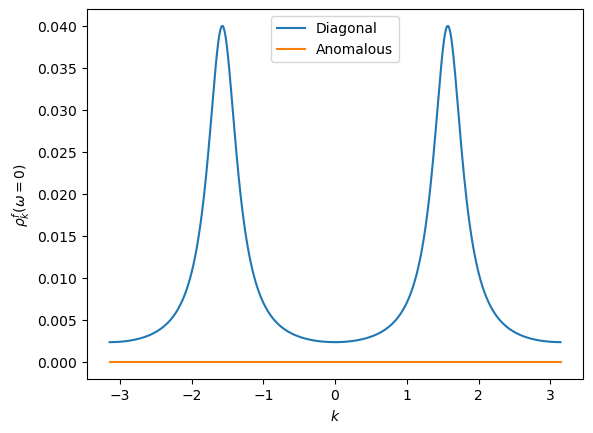

In [59]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = 0

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for k in k], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(k, rho_k[:, 0, 0], label="Diagonal")
#ax.plot(k, rho_k[:, 1, 1])
ax.plot(k, rho_k[:, 0, 2], label="Anomalous")
#ax.plot(k, rho_k[:, 1, 0])

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\rho^f_k(\omega=0)$");
ax.legend();

## Finite temperature $\omega=\Delta$

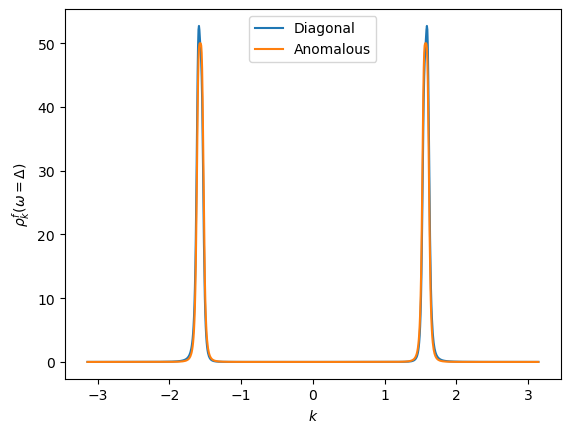

In [60]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = 0.5

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for k in k], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(k, rho_k[:, 0, 0], label="Diagonal")
#ax.plot(k, rho_k[:, 1, 1])
ax.plot(k, rho_k[:, 0, 2], label="Anomalous")
#ax.plot(k, rho_k[:, 1, 0])

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\rho^f_k(\omega=\Delta)$");
ax.legend();

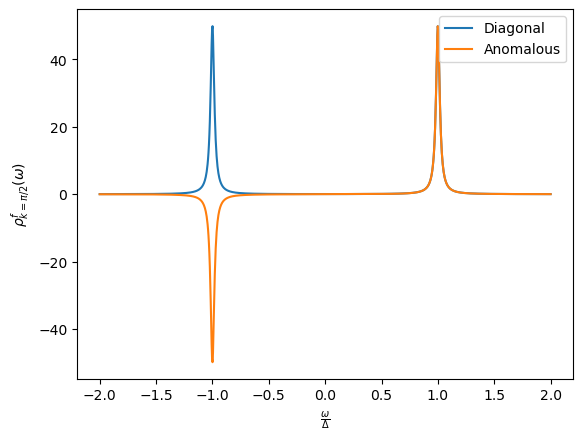

In [61]:
k = np.pi/2
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = np.linspace(-1, 1, 1000)

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for omega in omega], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(omega/Delta, rho_k[:, 0, 0], label="Diagonal")
ax.plot(omega/Delta, rho_k[:, 0, 2], label="Anomalous")

ax.set_xlabel(r"$\frac{\omega}{\Delta}$");
ax.set_ylabel(r"$\rho^f_{k=\pi/2}(\omega)$");
ax.legend();

## Fermi function derivative $\beta=10$

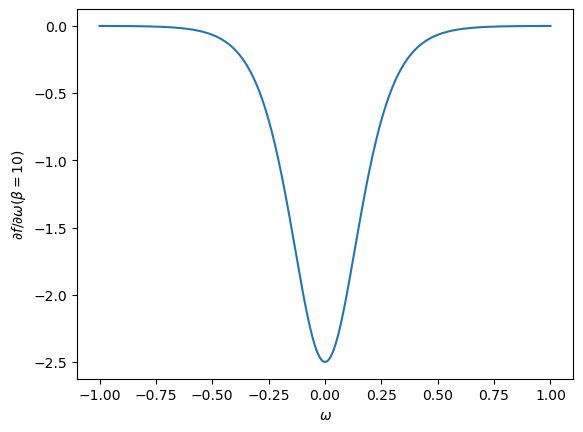

In [45]:
beta = 10
omega = np.linspace(-1, 1, 1000)

F = Fermi_function_derivative(omega, beta)
fig, ax = plt.subplots()
ax.plot(omega, F);
ax.set_ylabel(r"$\partial f/\partial \omega (\beta=10)$");
ax.set_xlabel("$\omega$");

In [64]:
k = np.linspace(-np.pi, np.pi)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = np.linspace(-1, 1, 1000)
beta = 10

get_sigma(k, omega, w_0, Gamma, B_x, B_y, Delta, mu, beta)

(-31.083480345444283+4.3133341323956246e-17j)

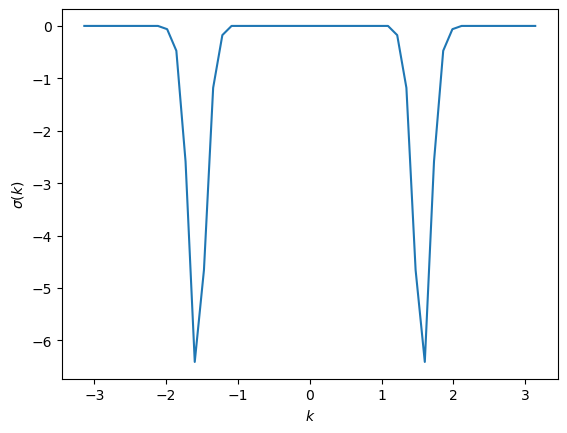

In [63]:
k = np.linspace(-np.pi, np.pi)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = np.linspace(-1, 1, 1000)
beta = 10

sigma_k = [get_sigma(np.array([k]), omega, w_0, Gamma, B_x, B_y, Delta, mu, beta) for k in k]
fig, ax  = plt.subplots()
ax.plot(k, sigma_k)

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\sigma(k)$");

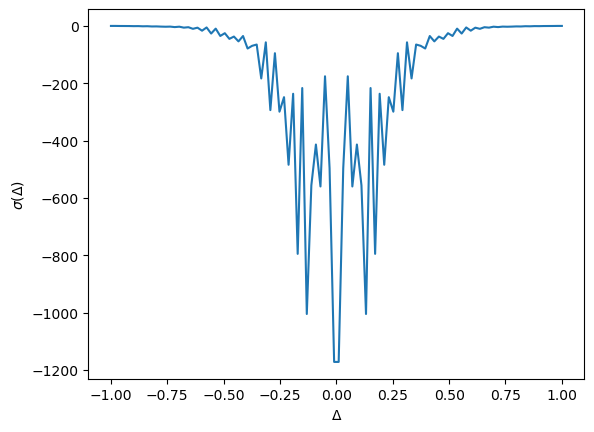

In [46]:
k = np.linspace(-np.pi, np.pi)
w_0 = 1
Gamma = 0.01
Delta = np.linspace(-1, 1, 100)
B_x = 0
B_y = 0
mu = 0
omega = np.linspace(-1, 1)
beta = 10

sigma_Delta = [get_sigma(k, omega, w_0, Gamma, B_x, B_y, Delta, mu, beta) for Delta in Delta]
fig, ax  = plt.subplots()
ax.plot(Delta, sigma_Delta)

ax.set_xlabel(r"$\Delta$");
ax.set_ylabel(r"$\sigma(\Delta)$");

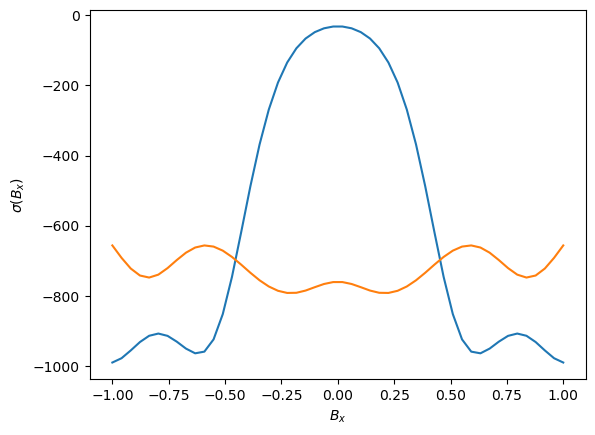

In [55]:
k = np.linspace(-np.pi, np.pi)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = np.linspace(-1, 1)
B_y = 0
mu = 0
omega = np.linspace(-1, 1, 100)
beta = 10

sigma_B_x_Delta = [get_sigma(k, omega, w_0, Gamma, B_x, B_y, Delta, mu, beta) for B_x in B_x]
sigma_B_x = [get_sigma(k, omega, w_0, Gamma, B_x, B_y, 0, mu, beta) for B_x in B_x]

fig, ax  = plt.subplots()
ax.plot(B_x, sigma_B_x_Delta)
ax.plot(B_x, sigma_B_x)

ax.set_xlabel(r"$B_x$");
ax.set_ylabel(r"$\sigma(B_x)$");